Usunięcie cudzysłowów w pliku

In [10]:
with open('all_tweets_id.csv', 'r') as f:
    zawartosc = f.read()

zawartosc = zawartosc.replace('"', '')

with open('all_tweets_id2.csv', 'w') as f:
    f.write(zawartosc)

Wczytanie datasetu utworzonego w Hydrator

In [11]:
import pandas as pd

dataset = pd.read_csv('dataset.csv')

# Część 1

1 i 2 - zamiana nazw dni tygodnia i nazw miesięcy

In [12]:

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = {
    'Mon': 'poniedziałek',
    'Tue': 'wtorek',
    'Wed': 'środa',
    'Thu': 'czwartek',
    'Fri': 'piątek',
    'Sat': 'sobota',
    'Sun': 'niedziela'
}

def month(s):
    for n, month in enumerate(months):
        s = s.replace(month, str(n+1).zfill(2))
    return s

def week(s):
    for day in days:
        s = s.replace(day, days[day])
    return s

zamienione = dataset.copy()
zamienione['created_at'] = zamienione['created_at'].apply(month)
zamienione['user_created_at'] = zamienione['user_created_at'].apply(week)



3, 4 i 5 - Zapisanie do list linków do tweetów, linków z tweetów i linków do obrazków

In [13]:
tweet_urls = list(dataset['tweet_url'])
urls_in_tweets = list(dataset['urls'].dropna())
media_urls = list(dataset['media'].dropna())

6 - Usunięcie stopwords

In [14]:
from spacy.lang.pl import Polish

nlp = Polish()

def remove_stopwords(s):
    r = ''
    for token in nlp(s):
        if not token.is_stop:
            r += token.text + token.whitespace_
    return r

dataset['text_without_stopwords'] = dataset['text'].map(remove_stopwords)

# Część 2

1 - top 5 polubień

In [15]:
top = dataset.nlargest(5, 'favorite_count')
print(top[['user_name','text','favorite_count']])

                                         user_name  \
2879   gay vodka jebie pis 🍸 is watching daredevil   
11433                                       joanna   
1752                          Ministerstwo Zdrowia   
1671                      WiadomościBliskoCiebie24   
12543                            Jacek Liziniewicz   

                                                    text  favorite_count  
2879   Koronawirus: potrzymaj mi piwo https://t.co/h2...            1179  
11433  co mutuje szybciej: koronawirus czy płodoplaka...            1022  
1752   Mamy 21 045 nowych i potwierdzonych przypadków...            1013  
1671   KORONAWIRUS W POLSCE  🇵🇱\n\n4.03 - 15250 przyp...             858  
12543  Rok temu koronawirus przykrył kampanię wyborcz...             777  


2 - top 5 retweetów

In [16]:
top = dataset.nlargest(5, 'retweet_count')
print(top[['user_name','text','retweet_count']])

                            user_name  \
4019                            Pedro   
7638                        Joan Bako   
7709                        Blablabla   
8814   Sławomir Narodowy z Krupówek🇵🇱   
10547                   İ.YILMAZ RT 1   

                                                    text  retweet_count  
4019   Bum❗️Aż o 3,5 mld zł w 4 lata PiS zadłużył słu...            566  
7638   To jest maseczka z klasy ochronnej FFP2.\nNosi...            420  
7709   To jest maseczka z klasy ochronnej FFP2.\nNosi...            420  
8814   To jest maseczka z klasy ochronnej FFP2.\nNosi...            420  
10547  #guezel1seyyaz\n#dememOki\n\nNe Olduğunuzu\nTe...            252  


3 - tweety które nie są "wrażliwe"

In [17]:
not_sensitive = dataset[dataset['possibly_sensitive'] != False]
print(not_sensitive[['user_name','text','retweet_count']])

                                           user_name  \
1                                 Gazeta Wyborcza.pl   
4            OkaMgnienie✝️🇵🇱 #MuremZaPolskimMundurem   
6                                             Laweta   
8      Marcus Paulus...Ch❤⛪❤BHO, VERITAS ODIUM PARIT   
9                                            Wanda_L   
...                                              ...   
13174                                         Laweta   
13176          Pan Grzegorz Rossa #BabiesLivesMatter   
13179                             Diana Wawrzusiszyn   
13180                                      Kerem Kaş   
13181                                Roland Zalewski   

                                                    text  retweet_count  
1      Iwona Hajnosz: Bałam się oddychać. Każdy oddec...              0  
4      Mamy 21 045 nowych i potwierdzonych przypadków...            156  
6      Szykują Nas na Istny Armagedon! Zamykają Polsk...              2  
8      "Bardzo Źli Ludzie posia

4 - Tweety użytkownika który założył konto najwcześniej

In [30]:
dataset['datetime'] = pd.to_datetime(dataset['user_created_at'])

In [74]:
user_date = dataset['datetime'].idxmin()
user_id = dataset.loc[user_date, 'user_id']
dataset[dataset['user_id']==user_id]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,datetime
7537,NaN,Sun Mar 07 07:53:29 +0000 2021,Covid,NaN,https://wydarzenia.interia.pl/raporty/raport-k...,1,1368469841498288131,NaN,NaN,NaN,...,294,"Nowa Huta, Polska",𝗦𝘁𝗮𝗻𝗶𝘀ł𝗮𝘄 𝗠. 𝗦𝘁𝗮𝗻𝘂𝗰𝗵 🇵🇱,dziennikarz,35653,NaN,http://www.dziennikarz.pl,True,"Znak, Szwecji wybito staruszków. \n\nChwile tr...",2007-03-23 11:53:55+00:00


5 - tweety użytkownika który ma najwięcej followersów

In [90]:
top = dataset['user_followers_count'].idxmax()
user_id = dataset.loc[top, 'user_id']
tweets_most_followers = dataset[dataset['user_id']==user_id]
print(tweets_most_followers)

      coordinates                      created_at hashtags  \
117           NaN  Thu Mar 11 19:08:46 +0000 2021      NaN   
419           NaN  Thu Mar 11 16:05:03 +0000 2021      NaN   
494           NaN  Thu Mar 11 15:22:07 +0000 2021      NaN   
832           NaN  Thu Mar 11 13:23:58 +0000 2021      NaN   
932           NaN  Thu Mar 11 13:17:07 +0000 2021    PILNE   
...           ...                             ...      ...   
12809         NaN  Thu Mar 04 06:10:39 +0000 2021      NaN   
12812         NaN  Thu Mar 04 06:01:54 +0000 2021      NaN   
12875         NaN  Thu Mar 04 06:19:49 +0000 2021      NaN   
12884         NaN  Thu Mar 04 06:27:09 +0000 2021      NaN   
12983         NaN  Wed Mar 03 21:24:26 +0000 2021      NaN   

                                                   media  \
117                                                  NaN   
419                                                  NaN   
494                                                  NaN   
832            

6 - tweety zweryfikowanych użytkowników

In [91]:
dataset[dataset['user_verified']==True]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,datetime
1,NaN,Thu Mar 11 19:40:35 +0000 2021,wyborcza koronawirus klubwyborczej,NaN,NaN,3,1370097337142542341,gazeta_wyborcza,1.370096e+18,19179390.0,...,1538,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,225543,NaN,https://bit.ly/2GLXBlN,True,Iwona Hajnosz: Bałam oddychać. oddech bolał. r...,2021-03-11 19:40:35+00:00
14,NaN,Thu Mar 11 20:16:56 +0000 2021,koronawirus wyborcza klubwyborczej,NaN,NaN,9,1370106488216293378,gazeta_wyborcza,1.370104e+18,19179390.0,...,1538,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,225543,NaN,https://bit.ly/2GLXBlN,True,"Dr Chudzik: Kluczowe , włączyć lekarzy rodzinn...",2021-03-11 20:16:56+00:00
27,NaN,Thu Mar 11 20:01:46 +0000 2021,wieszwięcej koronawirus,NaN,https://www.tvp.info/52738731/prezes-zus-ponad...,4,1370102670921510916,NaN,NaN,NaN,...,1123,Warszawa,tvp.info 🇵🇱,tvp_info,286667,NaN,NaN,True,"13 mld zł zwolnienia składek ZUS, świadczenia ...",2021-03-11 20:01:46+00:00
33,NaN,Thu Mar 11 19:35:24 +0000 2021,klubwyborczej koronawirus wyborcza,NaN,NaN,6,1370096033112465409,gazeta_wyborcza,1.370093e+18,19179390.0,...,1538,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,225543,NaN,https://bit.ly/2GLXBlN,True,Prof. Jan Szczegielniak: rehabilitacji dążymy ...,2021-03-11 19:35:24+00:00
63,NaN,Thu Mar 11 19:58:20 +0000 2021,wyborcza koronawirus klubwyborczej,NaN,http://m.in,2,1370101807788212226,gazeta_wyborcza,1.370101e+18,19179390.0,...,1538,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,225543,NaN,https://bit.ly/2GLXBlN,True,Dr Chudzika zaskoczyło COVIDZIE https://t.co/L...,2021-03-11 19:58:20+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13041,NaN,Wed Mar 03 22:02:33 +0000 2021,NaN,NaN,https://wiadomosci.onet.pl/swiat/koronawirus-c...,11,1367233965023784970,NaN,NaN,NaN,...,651,"Warsaw, Poland",Węglarczyk 🇵🇱🇪🇺🇺🇦🇺🇸,bweglarczyk,143641,NaN,https://wiadomosci.onet.pl/autorzy/bartosz-weg...,True,Czechy proszą Chiny szczepionkę przeciw COVID-...,2021-03-03 22:02:33+00:00
13048,NaN,Wed Mar 03 21:56:12 +0000 2021,RPO SN,NaN,NaN,0,1367232365869817856,NaN,NaN,NaN,...,1032,Polska,Rzeczpospolita,rzeczpospolita,227530,NaN,http://www.rp.pl,True,Rzecznik Praw Obywatelskich wniósł Sądu Najwyż...,2021-03-03 21:56:12+00:00
13065,NaN,Wed Mar 03 21:25:43 +0000 2021,NaN,NaN,https://wiadomosci.radiozet.pl/Koronawirus/Slo...,0,1367224694278131712,NaN,NaN,NaN,...,451,Poland,Radio ZET NEWS,RadioZET_NEWS,177018,NaN,http://wiadomosci.radiozet.pl,True,Wyjście domu 20:00 zaświadczeniem. Słowacja za...,2021-03-03 21:25:43+00:00
13103,NaN,Wed Mar 03 20:23:02 +0000 2021,USA Biden,NaN,https://www.rp.pl/Koronawirus-SARS-CoV-2/21030...,2,1367208918825451523,NaN,NaN,NaN,...,1032,Polska,Rzeczpospolita,rzeczpospolita,227530,NaN,http://www.rp.pl,True,#USA: Prezydent #Biden skrytykował decyzję gub...,2021-03-03 20:23:02+00:00


7 - w który dzień tygodnia najczęściej były publikowane tweety

In [144]:
dataset['datetime'] = pd.to_datetime(dataset['created_at'])

weekdays = dataset.groupby(dataset['datetime'].dt.day_name()).size()
weekdays

datetime
Friday       1482
Monday       1352
Saturday     1155
Sunday       1076
Thursday     4756
Tuesday      1563
Wednesday    1801
dtype: int64

# Część 3

1, 2, 3 - rozpoznanie osób, miejsc i organizacji

In [107]:
import pl_core_news_md

nlp = pl_core_news_md.load()
nlp.get_pipe("ner").labels

('date', 'geogName', 'orgName', 'persName', 'placeName', 'time')

In [133]:
def ner(s):
    person = None
    place = None
    org = None

    doc = nlp(s['text'])
    
    for ent in doc.ents:
        if ent.label_ == 'persName':
            person = ent.text
        elif ent.label_ == 'placeName':
            place = ent.text
        elif ent.label_ == 'orgName':
            org = ent.text

    return person, place, org

dataset[['persons', 'places', 'organizations']] = dataset.apply(ner, axis=1,  result_type="expand")

# Część 4

1 - wykres ilustrujący liczbę tweetów per dzień tygodnia

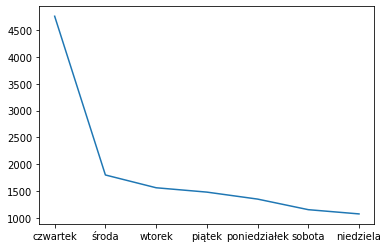

In [154]:
from matplotlib import pyplot as plt

d = weekdays.rename(index=lambda x: days[x[:3]]).sort_values(ascending=False)

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(d)
